<a href="https://colab.research.google.com/github/Zoya-Haris/Machine-Learning/blob/main/MiniHomePrices_MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/minihomeprices.csv')

In [ ]:
df.size

24

In [ ]:
df.shape

(6, 4)

In [ ]:
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
df.tail()

,area,bedrooms,age,price
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [ ]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [ ]:
d= df['bedrooms'].mean()
df['bedrooms'].fillna(d, inplace = True)
d

4.2

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
x = df.iloc[:,:-1]
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.2,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [ ]:
y = df.iloc[:,-1]
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

<AxesSubplot:xlabel='area', ylabel='price'>

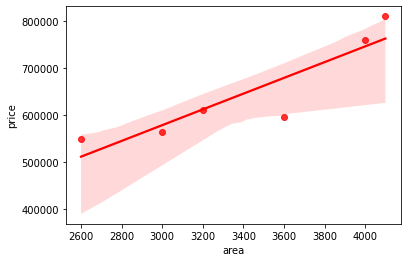

In [ ]:
sns.regplot(x=df['area'],y=y, color='red')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

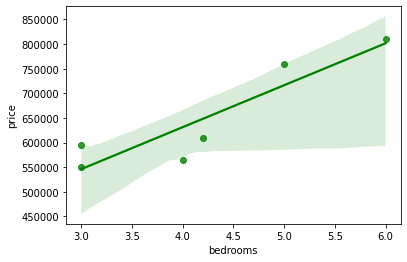

In [ ]:
sns.regplot(x=df['bedrooms'],y=y, color='green')

<AxesSubplot:xlabel='age', ylabel='price'>

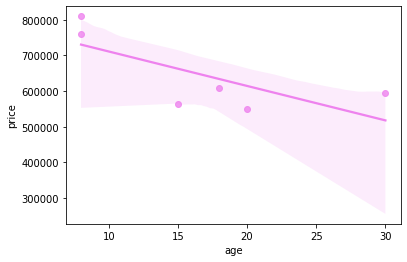

In [ ]:
sns.regplot(x=df['age'],y=y, color='violet')

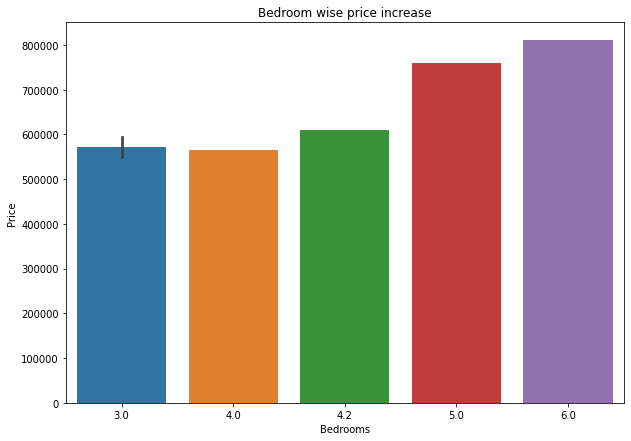

In [ ]:
plt.figure(figsize = (10,7))
plt.title('Bedroom wise price increase')

sns.barplot('bedrooms', 'price', data = df)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.30, random_state = 42)
x_train

,area,bedrooms,age
5,4100,6.0,8
2,3200,4.2,18
4,4000,5.0,8
3,3600,3.0,30


In [ ]:
x_train.shape, x_test.shape

((4, 3), (2, 3))

In [ ]:
y_train

5    810000
2    610000
4    760000
3    595000
Name: price, dtype: int64

In [ ]:
y_train.shape, y_test.shape

((4,), (2,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([485028.9017341 , 582355.49132948])

In [ ]:
lr.coef_, lr.intercept_

(array([  127.89017341, 37210.98265896, -1791.90751445]), 76719.65317918186)

In [ ]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
lr.predict([[3000,4,15]])

array([582355.49132948])

In [ ]:
df1 = pd.DataFrame({'Actual_Value':y_test, 'Predicted_Value':y_pred})
df1

,Actual_Value,Predicted_Value
0,550000,485028.901734
1,565000,582355.491329


In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
MSE

2261228344.5823216

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

47552.37475229099

In [ ]:
from sklearn.metrics import r2_score
R2score = r2_score(y_test,y_test)
R2score

1.0